## Assumptions
- Water is blue or red (muddy)
- All what we have is colors

In [1]:
import sys; sys.path.append('../../')
import numpy as np
import cv2
import matplotlib.pyplot as plt
from DataPreparation.DataPreparation import read_data
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
x_train_d, _, _, _ = read_data(normalize=False, new_size=256, transpose=True, saved=True)

x_train shape:  (737, 3, 256, 256)
x_val shape:  (185, 3, 256, 256)


In [3]:
def read_img(index):
  return np.float32(x_train_d[index].transpose(1,2,0).copy()/255)

def show_img(img):
  plt.imshow(img)
  plt.show()

def preprocess_img(img):
  avg_color = []
  for i in range(8):
    avg_color.append(np.mean(img[i*32:(i+1)*32,i*32:(i+1)*32], axis=(0,1)))
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))
  if sum > 4:
    img = img[:,:,::-1]
  print(sum)
  return img

def cluster(img):
  if len(img.shape) == 3:
    img_vec = img.reshape(-1,3)
  else:
    img_vec = img.reshape(-1,1)
  img_vec = np.float32(img_vec)
  kmeans = KMeans(n_clusters = 5, n_init=10, random_state=0).fit(img_vec)
  return kmeans

def get_mask(img, kmeans):
  labels = kmeans.labels_
  labels = labels.reshape((img.shape[0],img.shape[1]))
  # Color the labels with cluster centers
  mask = np.zeros_like(img)
  for i in range(len(kmeans.cluster_centers_)):
    mask[labels == i] = kmeans.cluster_centers_[i]
  return mask

def water_mask(img, kmeans):
  labels = kmeans.labels_
  labels = labels.reshape((img.shape[0],img.shape[1]))
  mask = np.zeros_like(img)
  for i in range(len(kmeans.cluster_centers_)):
    hsv = cv2.cvtColor(np.uint8([[kmeans.cluster_centers_[i]*255]]), cv2.COLOR_RGB2HSV)
    print(hsv,end=' ')
    hue = hsv[0][0][0]
    if hue > 196-100 and hue < 196+100:
      mask[labels == i] = [255,255,255]
  return mask

def show_case(index):
  img = read_img(index)
  img_proc = preprocess_img(img)
  kmeans = cluster(img_proc)
  water = water_mask(img_proc, kmeans)
  mask = get_mask(img_proc, kmeans)
  fig, ax = plt.subplots(1,4, figsize=(15,15))
  ax[0].imshow(img)
  ax[1].imshow(img_proc)
  ax[2].imshow(water)
  ax[3].imshow(mask)
  plt.show()

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/707088412.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[108  31  98]]] [[[111  19 134]]] [[[ 17  25 207]]] [[[60 22 59]]] [[[120   7 156]]] 

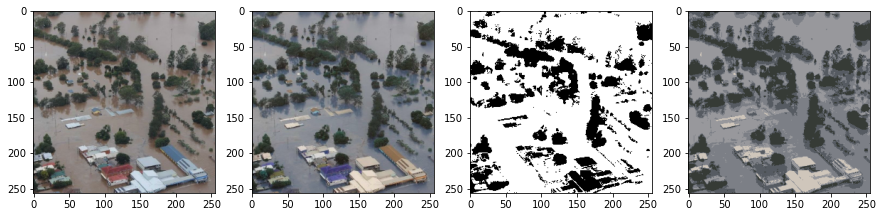

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/707088412.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 20  65 106]]] [[[ 24  25 202]]] [[[62 68 49]]] [[[ 87  22 127]]] [[[97 53 87]]] 

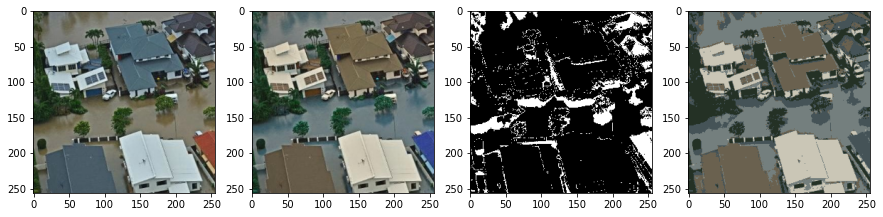

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/707088412.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[90 30 94]]] [[[108   6 202]]] [[[103  30 137]]] [[[70 37 62]]] [[[105  12 165]]] 

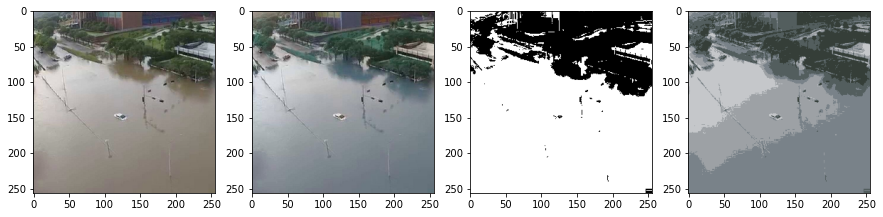

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/707088412.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


8
[[[ 97  55 161]]] [[[81 87 50]]] [[[ 96  26 187]]] [[[ 90  58 123]]] [[[89 64 88]]] 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


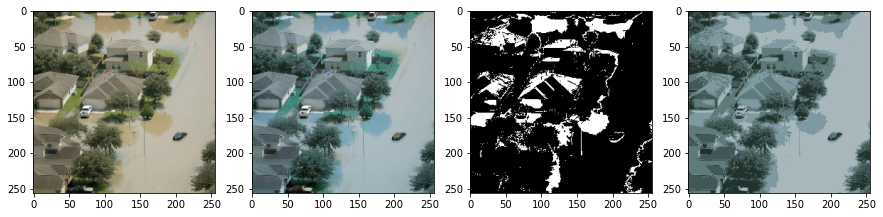

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/707088412.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[101  94  87]]] [[[100  51 115]]] [[[33 51 45]]] [[[104  19 205]]] [[[104  64 159]]] 

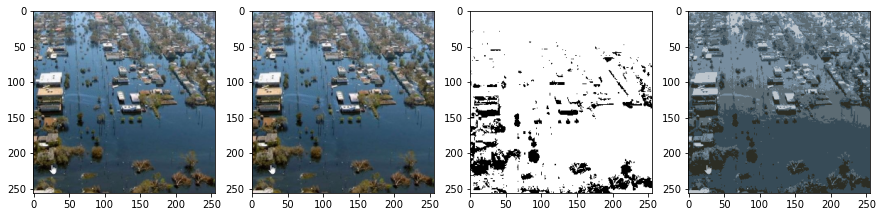

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/707088412.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


6
[[[150   2 136]]] [[[  9  21 230]]] [[[87 36 79]]] [[[  0   4 175]]] [[[ 95  15 104]]] 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


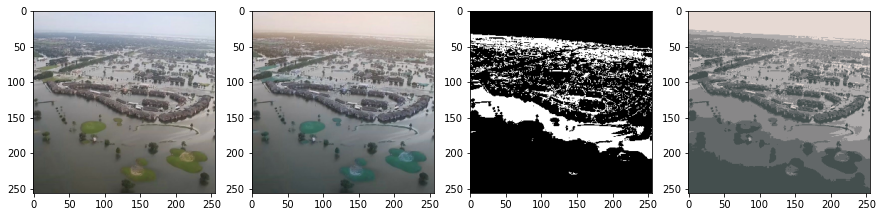

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/707088412.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[94 32 56]]] [[[108  73 133]]] [[[ 26   9 207]]] [[[109  18 156]]] [[[102  45  85]]] 

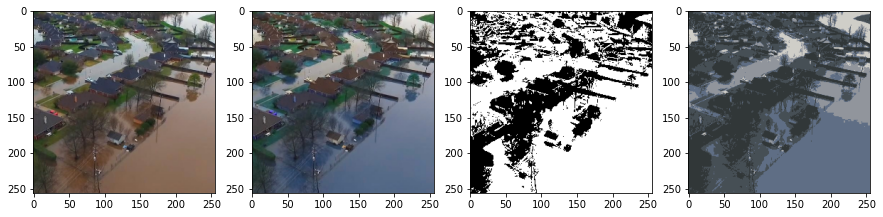

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/707088412.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[103  57  72]]] [[[108  32 105]]] [[[104  65  51]]] [[[108  23 131]]] [[[105  41  88]]] 

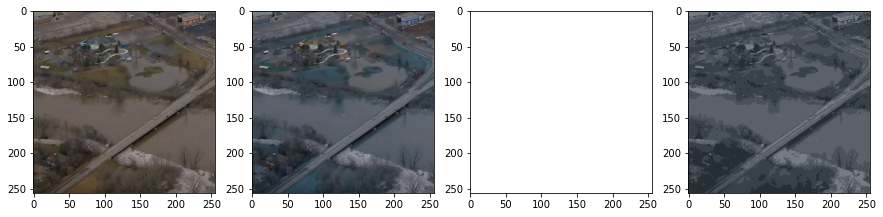

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/707088412.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


7
[[[105  20 178]]] [[[74 52 73]]] [[[ 87  11 228]]] [[[102  42 140]]] [[[ 83  54 108]]] 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


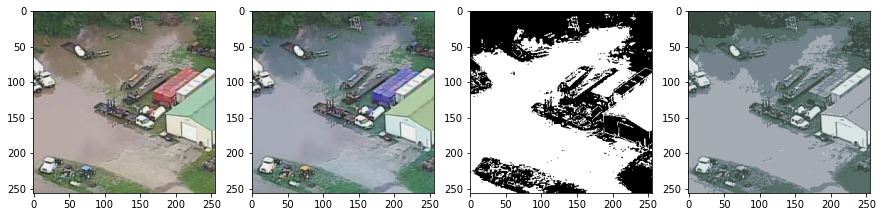

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/707088412.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 44  29 114]]] [[[ 76 107  31]]] [[[105  20 150]]] [[[44 61 80]]] [[[ 15   8 201]]] 

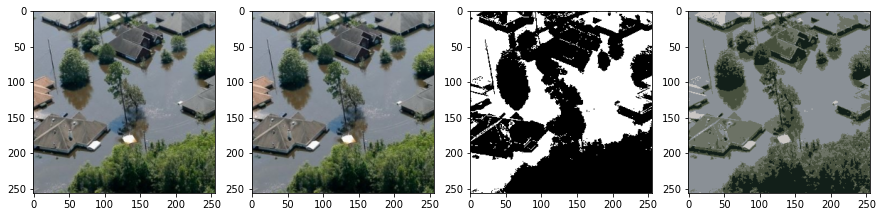

In [4]:
show_case(0)
show_case(5)
show_case(10)
show_case(61)
show_case(80)
show_case(71)
show_case(91)
show_case(21)
show_case(23)
show_case(40)

In [5]:
def read_img(index):
  return np.float32(x_train_d[index].transpose(1,2,0).copy()/255)

def show_img(img):
  plt.imshow(img)
  plt.show()

def preprocess_img(img):
  avg_color = []
  for i in range(8):
    avg_color.append(np.mean(img[i*32:(i+1)*32,i*32:(i+1)*32], axis=(0,1)))
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))
  if sum > 4:
    img = img[:,:,::-1]
  print(sum)
  return img

def cluster(img):
  if len(img.shape) == 3:
    img_vec = img.reshape(-1,3)
  else:
    img_vec = img.reshape(-1,1)
  img_vec = np.float32(img_vec)
  kmeans = KMeans(n_clusters = 8, n_init=10, random_state=0).fit(img_vec)
  return kmeans

def get_mask(img, kmeans):
  labels = kmeans.labels_
  labels = labels.reshape((img.shape[0],img.shape[1]))
  # Color the labels with cluster centers
  mask = np.zeros_like(img)
  for i in range(len(kmeans.cluster_centers_)):
    mask[labels == i] = kmeans.cluster_centers_[i]
  return mask

def water_mask(img, kmeans):
  labels = kmeans.labels_
  labels = labels.reshape((img.shape[0],img.shape[1]))
  mask = np.zeros_like(img)
  for i in range(len(kmeans.cluster_centers_)):
    hsv = cv2.cvtColor(np.uint8([[kmeans.cluster_centers_[i]*255]]), cv2.COLOR_RGB2HSV)
    print(hsv,end=' ')
    hue = hsv[0][0][0]
    if hue > 196-110 and hue < 196+110:
      mask[labels == i] = [255,255,255]
  return mask

def show_case(index):
  img = read_img(index)
  img_proc = preprocess_img(img)
  kmeans = cluster(img_proc)
  water = water_mask(img_proc, kmeans)
  mask = get_mask(img_proc, kmeans)
  fig, ax = plt.subplots(1,4, figsize=(15,15))
  ax[0].imshow(img)
  ax[1].imshow(img_proc)
  ax[2].imshow(water)
  ax[3].imshow(mask)
  plt.show()

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/4218106002.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[111  19 133]]] [[[78 19 68]]] [[[150   3 162]]] [[[109  25 112]]] [[[ 17  25 213]]] [[[109  14 148]]] [[[50 31 50]]] [[[108  33  92]]] 

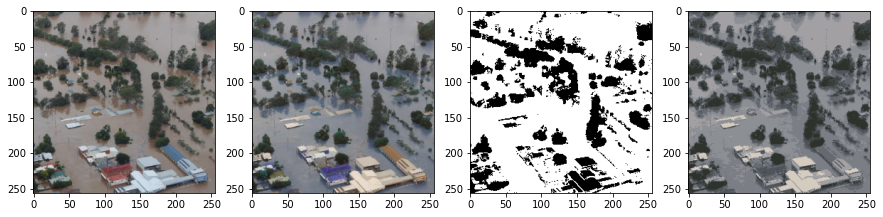

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/4218106002.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 24  26 207]]] [[[68 41 68]]] [[[ 33  17 163]]] [[[18 61 96]]] [[[64 81 44]]] [[[ 21  66 116]]] [[[101  80 108]]] [[[ 90  22 126]]] 

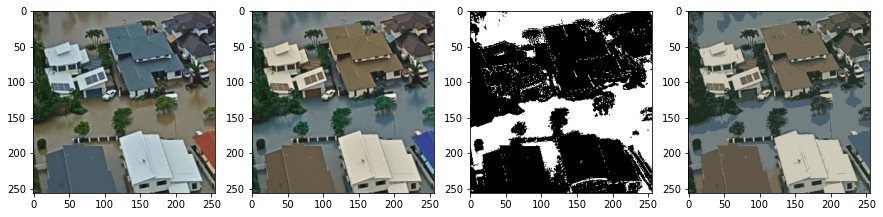

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/4218106002.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[101  13 159]]] [[[73 24 73]]] [[[108   7 179]]] [[[102  34 128]]] [[[103  25 144]]] [[[70 57 54]]] [[[110   7 208]]] [[[92 34 98]]] 

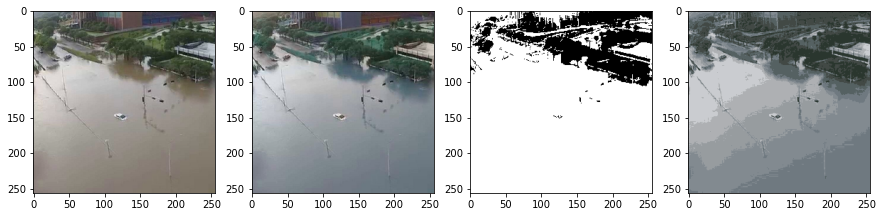

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/4218106002.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 89  62 119]]] [[[ 97  54 169]]] [[[77 89 40]]] [[[90 61 92]]] [[[ 94  50 142]]] [[[86 75 68]]] [[[ 98  28 219]]] [[[ 98  26 187]]] 

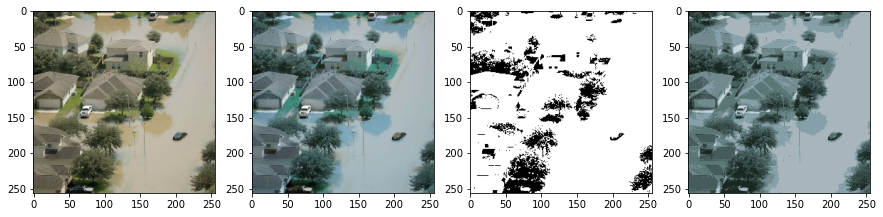

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/4218106002.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[101 102  80]]] [[[104  49 173]]] [[[ 75   4 115]]] [[[100   4 213]]] [[[30 60 38]]] [[[103 118 112]]] [[[103 101 154]]] [[[24 61 88]]] 

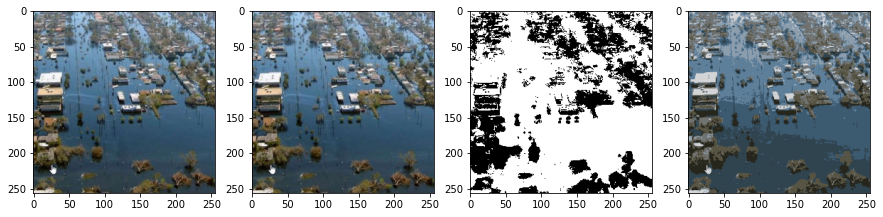

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/4218106002.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[87 30 86]]] [[[  0   5 162]]] [[[  9  22 232]]] [[[105   8 122]]] [[[ 95  15 102]]] [[[  0   4 187]]] [[[  0   4 140]]] [[[88 44 69]]] 

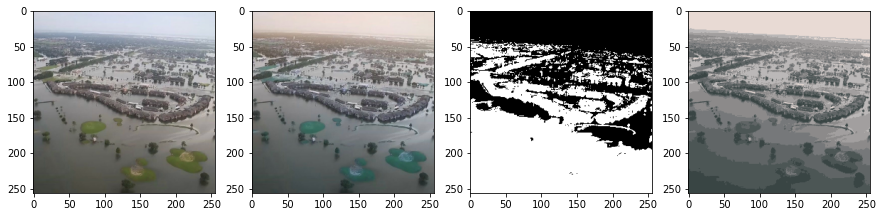

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/4218106002.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[102  76  74]]] [[[110  40 148]]] [[[ 26   8 217]]] [[[ 15   3 169]]] [[[90 43 48]]] [[[ 8 41 74]]] [[[108  79 133]]] [[[101  56  96]]] 

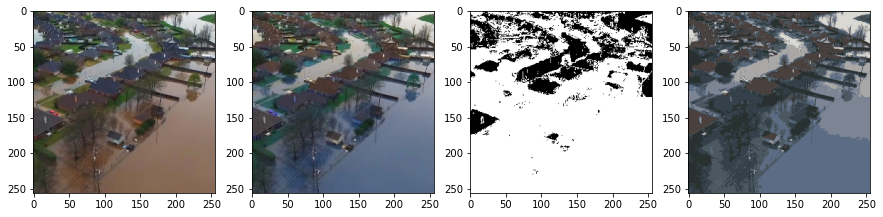

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/4218106002.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[105  57  71]]] [[[109  34 105]]] [[[111  17 148]]] [[[104  77  43]]] [[[106  36  92]]] [[[105  61  59]]] [[[108  27 121]]] [[[103  56  82]]] 

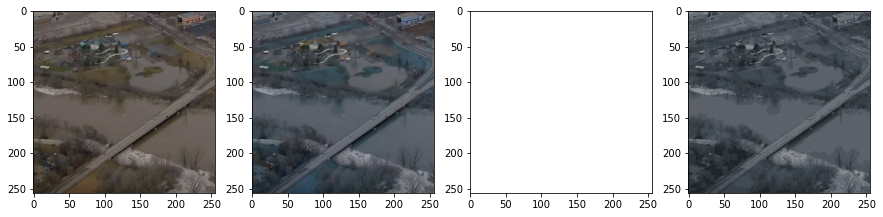

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/4218106002.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[101  47 135]]] [[[ 50  39 197]]] [[[76 50 87]]] [[[ 90  11 229]]] [[[104  30 160]]] [[[ 83  57 111]]] [[[112  25 183]]] [[[71 57 63]]] 

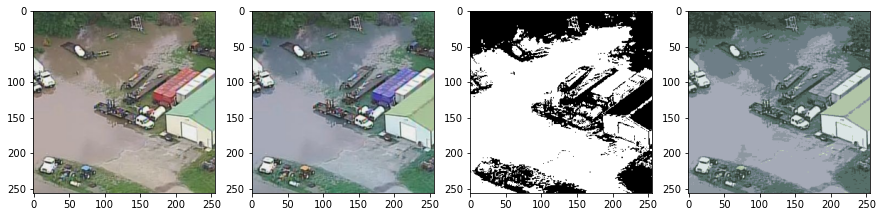

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/4218106002.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 81 151  22]]] [[[108  19 161]]] [[[43 69 78]]] [[[ 46  24 119]]] [[[42 52 99]]] [[[66 69 52]]] [[[ 18  11 232]]] [[[104  20 142]]] 

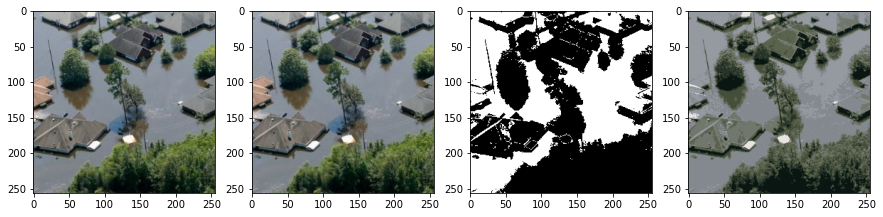

In [6]:
show_case(0)
show_case(5)
show_case(10)
show_case(61)
show_case(80)
show_case(71)
show_case(91)
show_case(21)
show_case(23)
show_case(40)

In [7]:
def read_img(index):
  return np.float32(x_train_d[index].transpose(1,2,0).copy()/255)

def show_img(img):
  plt.imshow(img)
  plt.show()

def preprocess_img(img):
  avg_color = []
  for i in range(8):
    avg_color.append(np.mean(img[i*32:(i+1)*32,i*32:(i+1)*32], axis=(0,1)))
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))
  if sum > 4:
    img = img[:,:,::-1]
  print(sum)
  return img

def cluster(img):
  if len(img.shape) == 3:
    img_vec = img.reshape(-1,3)
  else:
    img_vec = img.reshape(-1,1)
  img_vec = np.float32(img_vec)
  kmeans = KMeans(n_clusters = 4, n_init=10, random_state=0).fit(img_vec)
  return kmeans

def get_mask(img, kmeans):
  labels = kmeans.labels_
  labels = labels.reshape((img.shape[0],img.shape[1]))
  # Color the labels with cluster centers
  mask = np.zeros_like(img)
  for i in range(len(kmeans.cluster_centers_)):
    mask[labels == i] = kmeans.cluster_centers_[i]
  return mask

def water_mask(img, kmeans):
  labels = kmeans.labels_
  labels = labels.reshape((img.shape[0],img.shape[1]))
  mask = np.zeros_like(img)
  for i in range(len(kmeans.cluster_centers_)):
    hsv = cv2.cvtColor(np.uint8([[kmeans.cluster_centers_[i]*255]]), cv2.COLOR_RGB2HSV)
    print(hsv,end=' ')
    hue = hsv[0][0][0]
    if hue > 196-110 and hue < 196+110:
      mask[labels == i] = [255,255,255]
  return mask

def show_case(index):
  img = read_img(index)
  img_proc = preprocess_img(img)
  kmeans = cluster(img_proc)
  water = water_mask(img_proc, kmeans)
  mask = get_mask(img_proc, kmeans)
  fig, ax = plt.subplots(1,4, figsize=(15,15))
  ax[0].imshow(img)
  ax[1].imshow(img_proc)
  ax[2].imshow(water)
  ax[3].imshow(mask)
  plt.show()

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/3095048645.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[  8   6 172]]] [[[66 21 60]]] [[[109  28 102]]] [[[113  14 141]]] 

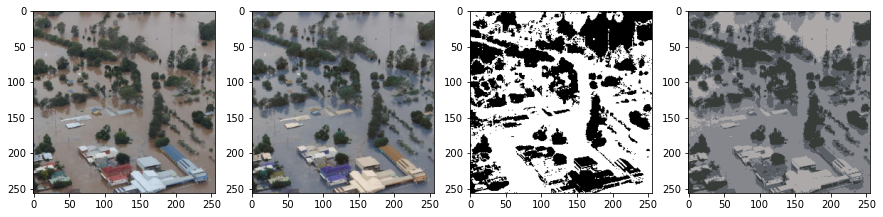

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/3095048645.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


5
[[[ 87  20 127]]] [[[33 25 93]]] [[[ 24  25 202]]] [[[65 65 51]]] 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


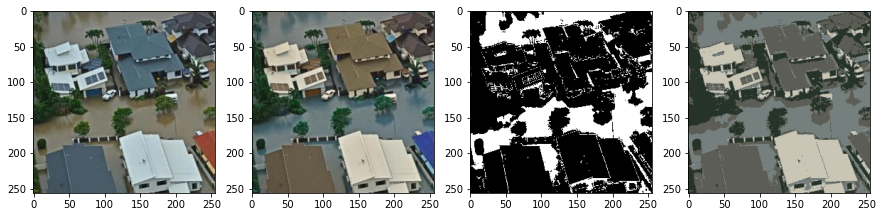

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/3095048645.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[101  31 130]]] [[[105   8 199]]] [[[105  16 159]]] [[[77 33 70]]] 

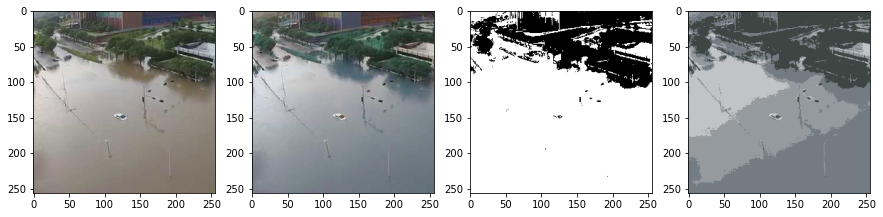

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/3095048645.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


8
[[[ 95  56 147]]] [[[ 97  29 186]]] [[[82 81 57]]] [[[ 89  62 103]]] 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


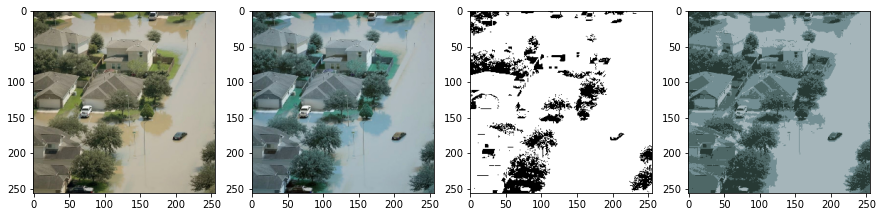

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/3095048645.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[86 32 55]]] [[[104  24 199]]] [[[101  83  98]]] [[[103  62 144]]] 

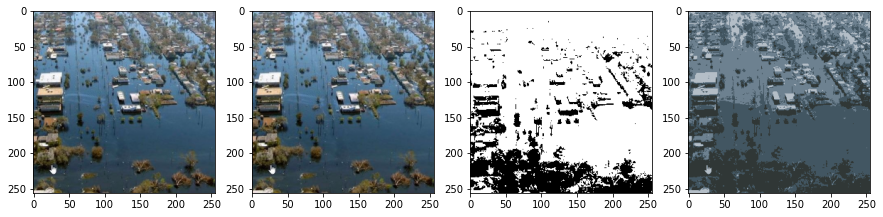

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/3095048645.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


6
[[[90 27 86]]] [[[ 10  20 228]]] [[[105   4 126]]] [[[  8   6 169]]] 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


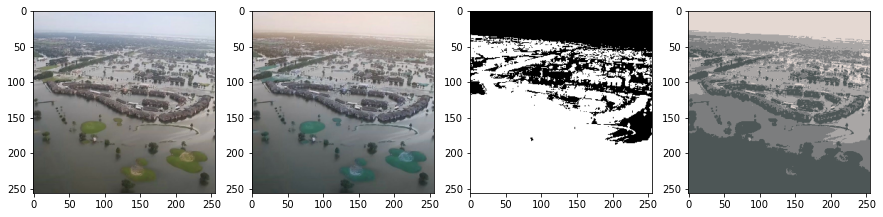

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/3095048645.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[99 31 57]]] [[[108  65 137]]] [[[ 30   1 180]]] [[[103  46  88]]] 

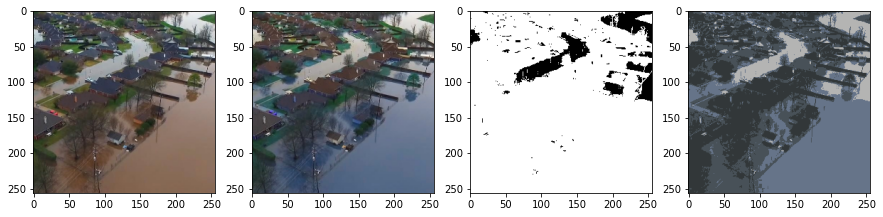

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/3095048645.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[110  24 129]]] [[[105  52  79]]] [[[108  33 102]]] [[[105  63  57]]] 

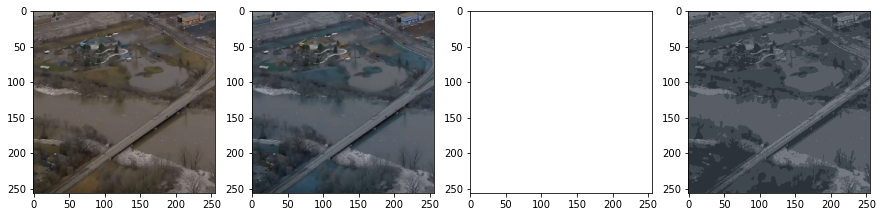

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/3095048645.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[106  22 177]]] [[[77 54 85]]] [[[ 97  45 129]]] [[[ 90  10 227]]] 

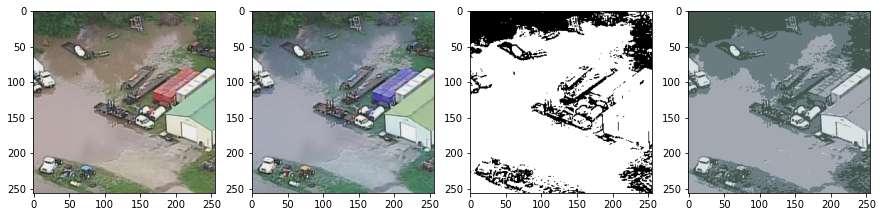

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_8528/3095048645.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(avg_color[i][0] > avg_color[i][2] for i in range(8))


2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[106  18 153]]] [[[ 75 112  32]]] [[[44 60 81]]] [[[ 46  29 116]]] 

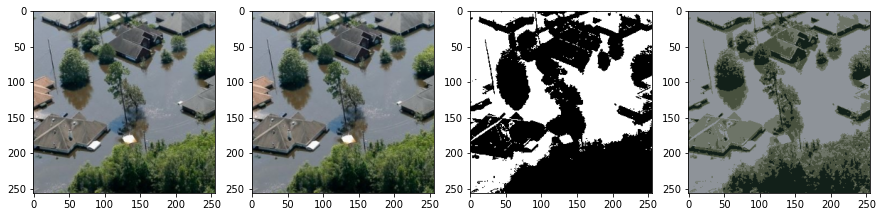

In [8]:
show_case(0)
show_case(5)
show_case(10)
show_case(61)
show_case(80)
show_case(71)
show_case(91)
show_case(21)
show_case(23)
show_case(40)